# Beispiel zur 2. Vorlesung: Transformation eines linearen Systems in Regelungsnormalform

Unter Verwendung des Paketes SymPy

Getested unter Python 3.11 und SymPy 1.12

**Achtung:** Die Rechnungen in diesem Notebook können etwas Zeit in Anspruch nehmen!

---

Die aktuelle Fassung dieses Notebooks findet sich in folgendem Repositorium:

https://gitlab.hrz.tu-chemnitz.de/rst/public/teaching/flavert-nbviewer-content

**Sie können zur Entwicklung/ Verbesserung über Merge Requests beitragen!**

---

<p style="font-family:Courier New; font-size:10pt">
Copyright (c) 2023 - 2024 Jan Winkler, TU Dresden, Germany
</p>

<p style="font-family:Courier New; font-size:10pt">
This program is free software: you can redistribute it and/or modify<br>
it under the terms of the GNU General Public License as published by<br>
the Free Software Foundation, either version 3 of the License, or<br>
(at your option) any later version.
</p>
    
<p style="font-family:Courier New; font-size:10pt">
This program is distributed in the hope that it will be useful,<br>
but WITHOUT ANY WARRANTY; without even the implied warranty of<br>
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the<br>
GNU General Public License for more details: <br>
<a href=https://www.gnu.org/licenses/gpl-3.0.txt>https://www.gnu.org/licenses/gpl-3.0.txt</a>.
</p>

---

In [1]:
import sympy as sp
from sympy import init_printing
init_printing(use_latex=True)

## Definition der Symbole

In [2]:
a22 = sp.Symbol('a_{22}')
a23 = sp.Symbol('a_{23}')
a42 = sp.Symbol('a_{42}')
a43 = sp.Symbol('a_{43}')
b2 = sp.Symbol('b_{2}')
b4 = sp.Symbol('b_{4}')
t = sp.Symbol('t')

## Definition zeitabhängiger Funktionen

In [3]:
x1 = sp.Function('x_1')(t)
x2 = sp.Function('x_2')(t)
x3 = sp.Function('x_3')(t)
x4 = sp.Function('x_4')(t)
u = sp.Function('u')(t)

# Zustandsvektor und Systemmatrizen

In [4]:
x=sp.Matrix([x1, x2, x3, x4])

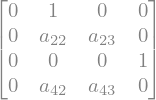

In [5]:
A = sp.Matrix([[0, 1, 0, 0], [0, a22, a23, 0], [0, 0, 0, 1], [0, a42, a43, 0]])
A

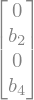

In [6]:
B = sp.Matrix([0, b2, 0, b4])
B

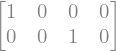

In [7]:
C = sp.Matrix([[1, 0, 0 ,0], [0, 0, 1, 0]])
C

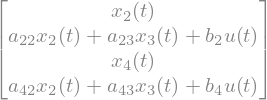

In [8]:
xDot = A*x + B*u
xDot

## Steuerbarkeitsmatrix aufstellen

Beim SymPy-Matrix-Befehl ist zu beachten, dass die Definition zeilenweise erfolgt:
\begin{equation}
M = 
\begin{pmatrix}
a_{11} &a_{12} &a_{13}\\
a_{21} &a_{22} &a_{23}\\
a_{31} &a_{32} &a_{33}
\end{pmatrix}
\end{equation}

==> `M = sp.Matrix([[a11, a12, a13], [a21, a22, a23], [a31, a32, a33]])`

Da die Steuerbarkeitsmatrix jedoch spaltenweise aufgebaut wird, müssen wir hier den Umweg über eine Doppeltransposition gehen.

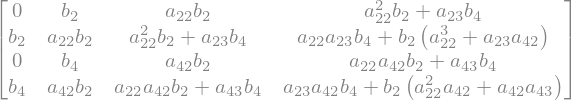

In [9]:
S = sp.Matrix([B.T, (A*B).T, (A**2*B).T, (A**3*B).T]).T
S

## Inverse der Steuerbarkeitsmatrix aufstellen

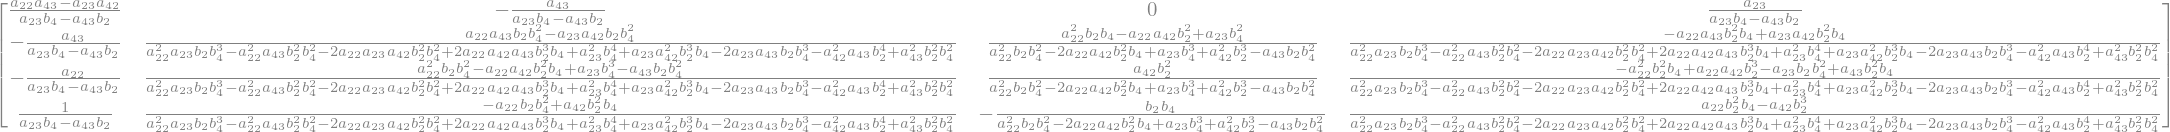

In [10]:
SInv = S.inv()
SInv

## Letzte Zeile der inversen Steuerbarkeitsmatrix extrahieren 

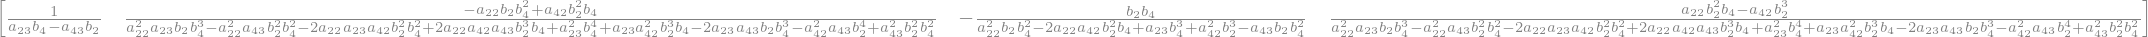

In [11]:
q =SInv[-1,:]
q

Transformationsmatrix $T$ aufstellen. Es gilt:
\begin{equation}
T = 
\begin{pmatrix}
q\\
q \cdot A\\
q \cdot A^2\\
q \cdot A^3
\end{pmatrix}
\end{equation}
Bemerkung: Die Einträge in der Liste des sympy Matrix-Befehls sind die einzelnen Zeilen.

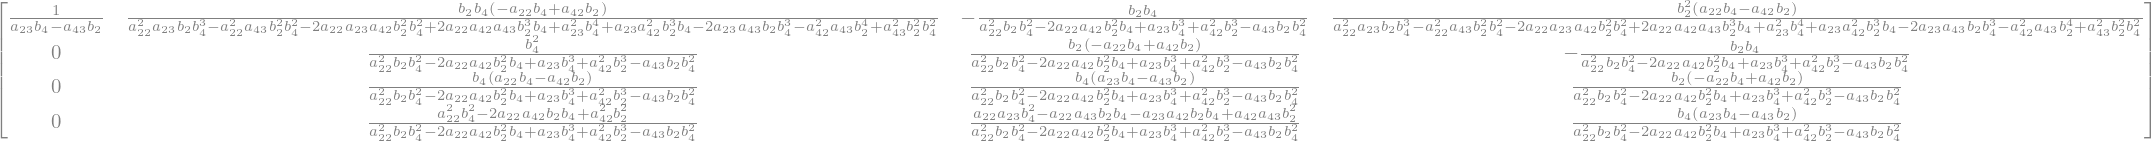

In [12]:
T = sp.simplify(sp.Matrix([q, q*A, q*A**2, q*A**3]))
T

Berechnung der Matrizen $A_R$ und $B_R$ in Regelungsnormalform. Es gilt:
\begin{align*}
A_R &= T \cdot A \cdot T^{-1}\\
B_R &= T \cdot B
\end{align*}
und damit lautet die Regelungsnormalform
\begin{align*}
\dot x_R &=  A_R \cdot x_R + B_R \cdot u \\
y &= C_R \cdot x_R
\end{align*}

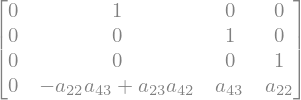

In [13]:
AR=sp.simplify(T*A*T.inv())
AR

In [14]:
BR = sp.simplify(T*B)
BR

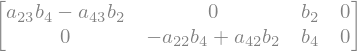

In [15]:
CR = sp.simplify(C*T.inv())
CR